<a href="https://colab.research.google.com/github/Letch49/ML-vvsu-2025-2026/blob/master/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
!pip install pandas seaborn scikit-learn

# Домашнее задание 4

1. Преобразовать датасет (процессинг категориальных признаков, копия данных в df_not_processed, scale датасета)
2. Сделать k-means кластеризацию (записать cluster в df_not_processed, вывести статистику, графики. попробовать объяснить принцип кластеризации), оценить метриками, вывести результат
3. Подобрать оптимальное число кластеров с помощью "метода локтя", вывести статистику, графики, метрики, объяснить результат
4. Сделать DBSSCAN кластеризацию, подобрать оптимальные параметры, посчитать метрики, вывести статистику, объяснить результат
5. Ответить на вопрос - какой из методов кластеризации больше подходит для вашего датасета

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns 

In [24]:
df = pd.read_csv('student_performance.csv')

In [25]:
df = df.drop(['student_id'], axis = 1)

In [26]:
df['grade'] = df['grade'].astype('category')  # процессим категориальные признаки
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column                   Non-Null Count    Dtype   
---  ------                   --------------    -----   
 0   weekly_self_study_hours  1000000 non-null  float64 
 1   attendance_percentage    1000000 non-null  float64 
 2   class_participation      1000000 non-null  float64 
 3   total_score              1000000 non-null  float64 
 4   grade                    1000000 non-null  category
dtypes: category(1), float64(4)
memory usage: 31.5 MB


In [27]:
from sklearn.preprocessing import OneHotEncoder

category_columns: list[str] = df.select_dtypes(include=['category']).columns # собираем колонки помеченные как category

# # Применяем One-Hot Encoding
# df = pd.get_dummies(df, columns=category_columns, drop_first=True)

# --- 1. Разделяем признаки на числовые и не числовые ---
num_cols = df.select_dtypes(include=['float64']).columns.tolist()     # числовые                                                # для LabelEncoder
cat_onehot = ['grade']  

# OneHotEncoder для 'grade'
ohe = OneHotEncoder(sparse_output=False)  # drop='first' убирает лишнюю колонку
grade_encoded = pd.DataFrame(
    ohe.fit_transform(df[['grade']]),
    columns=ohe.get_feature_names_out(['grade']),
)

# Объединяем всё в один датафрейм
df = pd.concat([df[num_cols], grade_encoded], axis=1)

In [28]:
df

,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade_A,grade_B,grade_C,grade_D,grade_F
0,18.5,95.6,3.8,97.9,1.0,0.0,0.0,0.0,0.0
1,14.0,80.0,2.5,83.9,0.0,1.0,0.0,0.0,0.0
2,19.5,86.3,5.3,100.0,1.0,0.0,0.0,0.0,0.0
3,25.7,70.2,7.0,100.0,1.0,0.0,0.0,0.0,0.0
4,13.4,81.9,6.9,92.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
999995,18.0,95.5,4.8,100.0,1.0,0.0,0.0,0.0,0.0
999996,15.7,82.7,6.7,88.3,1.0,0.0,0.0,0.0,0.0
999997,14.2,85.1,5.8,87.9,1.0,0.0,0.0,0.0,0.0
999998,25.3,90.0,5.3,100.0,1.0,0.0,0.0,0.0,0.0


In [29]:
df_not_processed = df.copy() # датасет для анализа

In [30]:
df_not_processed

,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade_A,grade_B,grade_C,grade_D,grade_F
0,18.5,95.6,3.8,97.9,1.0,0.0,0.0,0.0,0.0
1,14.0,80.0,2.5,83.9,0.0,1.0,0.0,0.0,0.0
2,19.5,86.3,5.3,100.0,1.0,0.0,0.0,0.0,0.0
3,25.7,70.2,7.0,100.0,1.0,0.0,0.0,0.0,0.0
4,13.4,81.9,6.9,92.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
999995,18.0,95.5,4.8,100.0,1.0,0.0,0.0,0.0,0.0
999996,15.7,82.7,6.7,88.3,1.0,0.0,0.0,0.0,0.0
999997,14.2,85.1,5.8,87.9,1.0,0.0,0.0,0.0,0.0
999998,25.3,90.0,5.3,100.0,1.0,0.0,0.0,0.0,0.0


In [31]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Выбираем числовые признаки
numeric_features = df.select_dtypes(include=['float64']).columns.tolist()

# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
df_not_processed[numeric_features] = scaler.fit_transform(df[numeric_features])


In [32]:
df_not_processed

,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade_A,grade_B,grade_C,grade_D,grade_F
0,0.4625,0.912,0.38,0.976821,1.0,0.0,0.0,0.0,0.0
1,0.3500,0.600,0.25,0.822296,0.0,1.0,0.0,0.0,0.0
2,0.4875,0.726,0.53,1.000000,1.0,0.0,0.0,0.0,0.0
3,0.6425,0.404,0.70,1.000000,1.0,0.0,0.0,0.0,0.0
4,0.3350,0.638,0.69,0.911700,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
999995,0.4500,0.910,0.48,1.000000,1.0,0.0,0.0,0.0,0.0
999996,0.3925,0.654,0.67,0.870861,1.0,0.0,0.0,0.0,0.0
999997,0.3550,0.702,0.58,0.866446,1.0,0.0,0.0,0.0,0.0
999998,0.6325,0.800,0.53,1.000000,1.0,0.0,0.0,0.0,0.0


### 2. K-среднее

In [33]:
X = df_not_processed.to_numpy()

In [34]:
from sklearn.cluster import KMeans

# Обучаем K-Means
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(X)

# Копируем исходный DataFrame
# Добавляем колонку с номерами кластеров в df_not_processed
df_not_processed['cluster'] = clusters

# Средние значения по каждому кластеру
cluster_means = df_not_processed.groupby('cluster').mean()

cluster_means.round(2)


,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade_A,grade_B,grade_C,grade_D,grade_F
cluster,,,,,,,,,
0,0.19,0.83,0.64,0.60,0.0,0.0,1.0,0.00,0.00
1,0.48,0.57,0.69,0.96,1.0,0.0,0.0,0.00,0.00
2,0.30,0.69,0.60,0.76,0.0,1.0,0.0,0.00,0.00
3,0.09,0.70,0.60,0.42,0.0,0.0,0.0,0.88,0.12
4,0.19,0.54,0.55,0.60,0.0,0.0,1.0,0.00,0.00
5,0.48,0.81,0.51,0.96,1.0,0.0,0.0,0.00,0.00


In [35]:
X_scaled = X[:20000] # Делаем срез датасета, потому что не вывозим
X_scaled

array([[0.4625, 0.912 , 0.38  , ..., 0.    , 0.    , 0.    ],
       [0.35  , 0.6   , 0.25  , ..., 0.    , 0.    , 0.    ],
       [0.4875, 0.726 , 0.53  , ..., 0.    , 0.    , 0.    ],
       ...,
       [0.44  , 0.952 , 0.61  , ..., 0.    , 0.    , 0.    ],
       [0.675 , 0.77  , 0.81  , ..., 0.    , 0.    , 0.    ],
       [0.0925, 0.578 , 0.3   , ..., 1.    , 0.    , 0.    ]],
      shape=(20000, 9))

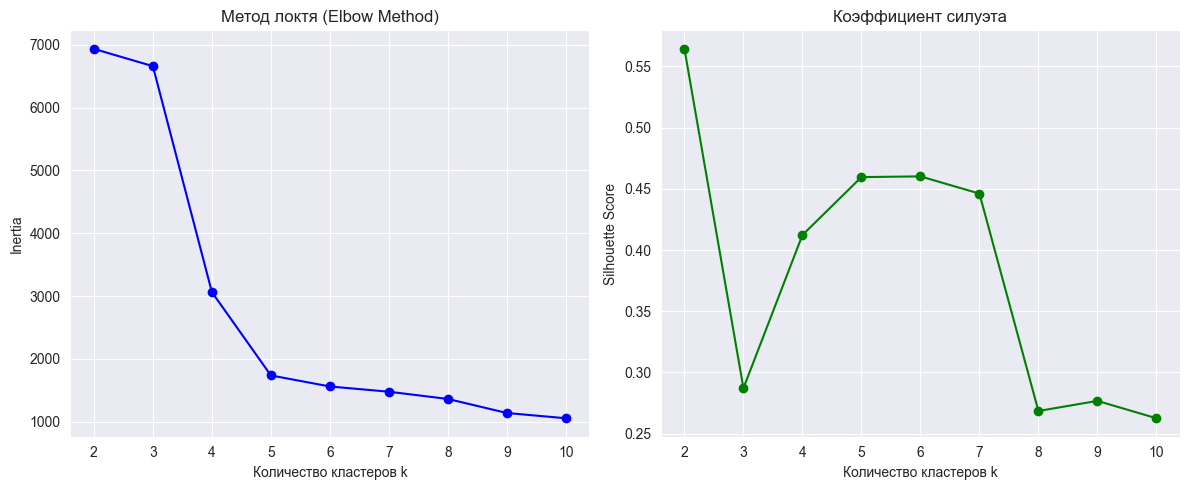

In [36]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertias = []
silhouettes = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)

    inertias.append(kmeans.inertia_)  # внутренняя метрика K-Means
    silhouettes.append(silhouette_score(X_scaled, kmeans.labels_))  # внешняя метрика

# Визуализация "метода локтя"
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K, inertias, 'bo-')
plt.xlabel('Количество кластеров k')
plt.ylabel('Inertia')
plt.title('Метод локтя (Elbow Method)')

plt.subplot(1,2,2)
plt.plot(K, silhouettes, 'go-')
plt.xlabel('Количество кластеров k')
plt.ylabel('Silhouette Score')
plt.title('Коэффициент силуэта')
plt.tight_layout()
plt.show()

#### Как можно было заметить, это не полный датасет. Почему так? Даже со 100000 строками обработка занимает более 10 минут. Не понятно даже, за сколько должна обработаться модель в 1000000 строк.
В общем, даже так можно увидеть показатели.





### Так что в итоге?
Видно на "локтевом" графике, что показатель inertia перестал серьёзно меняться когда кластеров стало 5. Если посмотреть на silhouette score, видно, что показатель лучше всего был при 2 кластерах, однако показатель также хорошо себя проявляет при кол-ве кластеров от 5 до 7.
Из этого можно сделать вывод, который я увидел в видео по ссылке в посте в тг канале. Оптимальный вариант - 5 кластеров. Не знаю, насколько была бы большая разница, если бы было 1000000 строк, но, надеюсь, весьма похожий.

# 4. DBSCAN

In [16]:
df_not_processed

,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade_A,grade_B,grade_C,grade_D,grade_F,cluster
0,0.4625,0.912,0.38,0.976821,1.0,0.0,0.0,0.0,0.0,5
1,0.3500,0.600,0.25,0.822296,0.0,1.0,0.0,0.0,0.0,2
2,0.4875,0.726,0.53,1.000000,1.0,0.0,0.0,0.0,0.0,5
3,0.6425,0.404,0.70,1.000000,1.0,0.0,0.0,0.0,0.0,1
4,0.3350,0.638,0.69,0.911700,1.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
999995,0.4500,0.910,0.48,1.000000,1.0,0.0,0.0,0.0,0.0,5
999996,0.3925,0.654,0.67,0.870861,1.0,0.0,0.0,0.0,0.0,1
999997,0.3550,0.702,0.58,0.866446,1.0,0.0,0.0,0.0,0.0,5
999998,0.6325,0.800,0.53,1.000000,1.0,0.0,0.0,0.0,0.0,5


In [19]:
df_not_processed_scaled = df_not_processed.iloc[:20000] # Опять же, датасет большой, не вывозим
df_not_processed_scaled

,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade_A,grade_B,grade_C,grade_D,grade_F,cluster
0,0.4625,0.912,0.38,0.976821,1.0,0.0,0.0,0.0,0.0,5
1,0.3500,0.600,0.25,0.822296,0.0,1.0,0.0,0.0,0.0,2
2,0.4875,0.726,0.53,1.000000,1.0,0.0,0.0,0.0,0.0,5
3,0.6425,0.404,0.70,1.000000,1.0,0.0,0.0,0.0,0.0,1
4,0.3350,0.638,0.69,0.911700,1.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
19995,0.4425,0.650,0.75,1.000000,1.0,0.0,0.0,0.0,0.0,1
19996,0.6150,0.638,0.47,1.000000,1.0,0.0,0.0,0.0,0.0,5
19997,0.4400,0.952,0.61,1.000000,1.0,0.0,0.0,0.0,0.0,5
19998,0.6750,0.770,0.81,1.000000,1.0,0.0,0.0,0.0,0.0,1


In [20]:
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np

# Обучаем DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # параметры можно подобрать
clusters = dbscan.fit_predict(X_scaled)

# Копируем исходный DataFrame
df_cluster = df_not_processed_scaled.copy()

# Добавляем колонку с номерами кластеров
df_cluster['cluster'] = clusters

# Смотрим, какие кластеры сформировались
print("Количество найденных кластеров (без -1):", len(set(clusters)) - (1 if -1 in clusters else 0))
print("Количество выбросов (cluster = -1):", np.sum(clusters == -1))

# Средние значения по каждому кластеру
cluster_means = df_cluster.groupby('cluster').mean().round(2)

cluster_means

Количество найденных кластеров (без -1): 5
Количество выбросов (cluster = -1): 0


,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade_A,grade_B,grade_C,grade_D,grade_F
cluster,,,,,,,,,
0,0.48,0.70,0.60,0.96,1.0,0.0,0.0,0.0,0.0
1,0.30,0.69,0.60,0.76,0.0,1.0,0.0,0.0,0.0
2,0.19,0.69,0.60,0.60,0.0,0.0,1.0,0.0,0.0
3,0.09,0.70,0.60,0.44,0.0,0.0,0.0,1.0,0.0
4,0.03,0.72,0.62,0.28,0.0,0.0,0.0,0.0,1.0


In [21]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler

# Обучаем DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# Добавляем кластеры в DataFrame
df_cluster = df_not_processed_scaled.copy()
df_cluster['cluster'] = clusters

# Убираем выбросы (-1) перед метриками
mask = clusters != -1
X_valid = X_scaled[mask]
labels_valid = clusters[mask]

if len(set(labels_valid)) > 1:  # нужно хотя бы 2 кластера для оценки
    sil = silhouette_score(X_valid, labels_valid)
    dbi = davies_bouldin_score(X_valid, labels_valid)
    chi = calinski_harabasz_score(X_valid, labels_valid)

    print(f"Silhouette Score: {sil:.3f}")
    print(f"Davies-Bouldin Index: {dbi:.3f}")
    print(f"Calinski-Harabasz Index: {chi:.3f}")
else:
    print("Недостаточно кластеров для расчёта метрик.")


Silhouette Score: 0.739
Davies-Bouldin Index: 0.376
Calinski-Harabasz Index: 36254.058


## **Анализ**:

Видно, что у **DBSCAN** больше счёт силуэта, чем у K-means, причём даже в том варианте, когда у k-means было всего 2 кластера. По другим метрикам так же видно, что:

---
#### а) индекс Дэвиса-Болдина меньше 1, что ХОРОШО  
#### б) критерий соотношения дисперсий, VRC очень высок, что ТОЖЕ ХОРОШО.


однако, видно, k-means тоже неплохая альтернатива.